## Plot for 4D scan: $g$, $m_4$, $|U_{e4}|^2$, $|U_{\mu 4}|^2$

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import MicroTools as micro
import MicroTools.plot_tools as pt

## Slicings of g, and $|U_{e4}|^2$

<ipython-input-7-8ae015c7aff8>:43: UserWarning: linewidths is ignored by contourf
  ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)


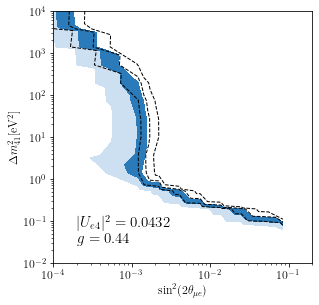

In [7]:
Npoints = 15
# Range of g for sterile decay model scanned over 1e-1 to 1e2 in 15 steps
g = np.geomspace(1e-1, 1e2, Npoints)

# Range of m scanned over 1e-1 to 1e2 in 15 steps
m = np.geomspace(1e-1, 1e2, Npoints)

# Range of |U_{e4}|^2 scanned over 1e-4 to 0.49 in 15 steps
e = np.geomspace(1e-4, 0.49, Npoints)

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 0.49 in 15 steps
mu = np.geomspace(1e-4, 0.49, Npoints)
gvalue = g[3]
evalue = e[10]
# 4D parameter scan
path_results = "fit_data/"
data = np.load(f"{path_results}/App_g_m4_Ue4sq_Um4sq_deg.npy", allow_pickle=True)

# Filter entries for fixed g and e
data_slice = np.array([entry for entry in data if entry[0] == gvalue and entry[2] == evalue])
MiniApp_chi2 = data_slice[:,-3]
MicroApp_chi2 = data_slice[:,-2]
MicroApp_Asimov_chi2 = data_slice[:,-1]
MiniApp_deltachi2 = MiniApp_chi2 - np.min(MiniApp_chi2)
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MicroApp_Asimov_deltachi2 = MicroApp_Asimov_chi2 - np.min(MicroApp_Asimov_chi2)

MVec, gm4VecT = 4 * evalue * data_slice[:,3], data_slice[:,1]**2

fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 2e-1, 1e-2, 1e4
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
#ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=pt.font)
ax.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)
ax.set_xlabel(r"$\sin^2(2\theta_{\mu e})$", fontproperties=pt.font)
ax.text(2e-4, 3e-2, '$|U_{e4}|^2=%.4f$\n$g=%.2f$'%(evalue,gvalue), fontsize = 15)

levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 11.83, 19.33]
ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
ax.tricontour(MVec, gm4VecT, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1, linestyles=['--'])


## Marginalize over $\textrm{g}$ and $|U_{e4}|^2$ for minimal MicroBooNE $\chi^2$

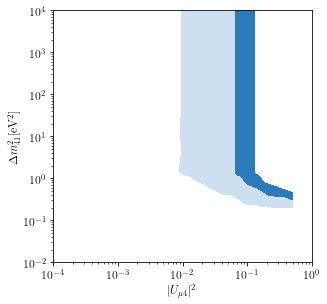

In [164]:
Npoints = 15
slice_marg = []

for i in range(Npoints):
    slice_m = data[data[:, 1] == m[i], :]
    for j in range(Npoints):
        slice_mu = slice_m[slice_m[:, 3] == mu[j], :]
        min_entry = slice_mu[np.argmin(slice_mu[:, -2])]
        slice_marg.append(min_entry)
slice_marg = np.array(slice_marg)
MicroApp_chi2 = slice_marg[:,-2]
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MVec = slice_marg[:,3]
#MVec = [4 * slice_marg[i,2] * slice_marg[i,3] for i in range(len(slice_marg))]
gm4VecT = slice_marg[:,1]**2
fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e4
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
#ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=pt.font)
ax.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)

levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 11.83, 19.33]
ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1)

## Fix $m_4=1\textrm{keV}$, marginalize over $|U_{e4}|^2$

<ipython-input-8-b8daaad1cd92>:57: UserWarning: linewidths is ignored by contourf
  ax.tricontourf(MVec, gVecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
No handles with labels found to put in legend.


225
225
225


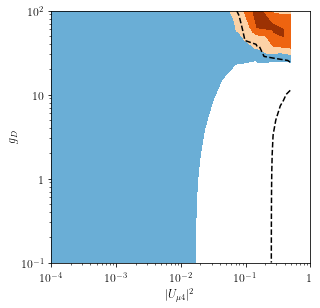

In [8]:
# 4D parameter scan
path_results = "fit_data/"
data = np.load(f"{path_results}/App_g_m4_Ue4sq_Um4sq_deg.npy", allow_pickle=True)

#gm4VecT, EVec, MVec = data[:,0], data[:,1], data[:,2]

MiniApp_chi2 = data[:,-3]
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]
Npoints = 15
def marg(chi2, which_axis):
    chi2_rs = np.reshape(chi2, (Npoints, Npoints, Npoints))
    min_chi2 = np.min(chi2_rs, axis = which_axis)
    min_chi2 = np.ravel(min_chi2)
    delta_chi2 = min_chi2 - np.min(min_chi2)
    return delta_chi2

# Range of g for sterile decay model scanned over 1e-1 to 1e2 in 15 steps
g = np.geomspace(1e-1, 1e2, Npoints)

# Range of m scanned over 1e-1 to 1e2 in 15 steps
m = np.geomspace(1e-1, 1e2, Npoints)

# Range of |U_{e4}|^2 scanned over 1e-4 to 0.49 in 15 steps
e = np.geomspace(1e-4, 0.49, Npoints)

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 0.49 in 15 steps
mu = np.geomspace(1e-4, 0.49, Npoints)

gVecT, MVec = np.meshgrid(g,mu)
gVecT, MVec = np.ravel(gVecT), np.ravel(MVec)

# marg over e
MiniApp_deltachi2 = marg(MiniApp_chi2,which_axis = 2)
MicroApp_deltachi2 = marg(MicroApp_chi2,which_axis = 2)
MicroApp_Asimov_deltachi2 = marg(MicroApp_Asimov_chi2,which_axis = 2)
print(np.size(gVecT))
print(np.size(MVec))
print(np.size(MiniApp_deltachi2))

fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-1, 1e2
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$g_D$', fontproperties=pt.font)        
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_yticks([1e-1, 1, 10, 100])
[l.set_size(pt.labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(pt.labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=pt.labelfont)
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=pt.labelfont)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)


levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 1e10]
ax.tricontourf(MVec, gVecT, MicroApp_deltachi2, levels=levsMicroB, cmap='Blues', alpha=1, linewidths=1.5)
ax.tricontour(MVec, gVecT, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1.5, linestyles=['--'])
ax.tricontourf(MVec, gVecT, MiniApp_deltachi2, levels=levsMiniB, cmap='Oranges_r', alpha=1)

#fleft = interp1d(10**MBupper[:,1], 10**MBupper[:,0], bounds_error=False, fill_value='extrapolate')
#fright = interp1d(10**MBlower[:,1], 10**MBlower[:,0], bounds_error=False, fill_value='extrapolate')
#y = np.geomspace(np.min([10**MBupper[:,1].min(), 10**MBlower[:,1].min()]), np.max([10**MBupper[:,1].max(), 10**MBlower[:,1].max()]))
#ax.fill_betweenx(y, fleft(y), fright(y), edgecolor='black', hatch='////', facecolor='None', alpha=0.5, label='deGouvea MB $2\sigma$')

ax.legend(loc = 'lower left', fontsize = 10)

fig.savefig(f"{micro.path_plots}/Fixed_m4_1e3_15*15*15_v1.pdf", bbox_inches='tight')